# Ensemble Learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Classification

In [4]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=500, noise=0.4, random_state=1)

In [11]:
def plot_dataset(x, y, axes):
  plt.plot(x[y==0, 0], x[y==0, 1], "ro", markersize=3)
  plt.plot(x[y==1, 0], x[y==1, 1], "g^", markersize=3)
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20)

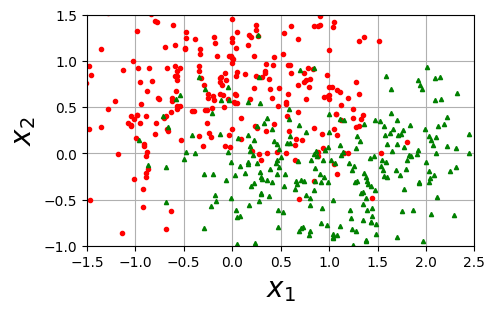

In [12]:
plt.figure(figsize=(5, 3))
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression(solver='lbfgs', random_state=1)
svm_clf = SVC(random_state=1)
tree_clf = DecisionTreeClassifier(random_state=1)

for clf in (log_clf, svm_clf, tree_clf):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(clf.__class__.__name__,clf.score(x_test, y_test))

LogisticRegression 0.8
SVC 0.816
DecisionTreeClassifier 0.792


### Hard Voting Classifier / Majority-Vote Classifier

In [22]:
from sklearn.ensemble import VotingClassifier

hard_clf = VotingClassifier([
  ('lr', log_clf),
  ('svc', svm_clf),
  ('tree', tree_clf)
], voting='hard')

hard_clf.fit(x_train, y_train)
hard_clf.score(x_test, y_test)

0.824

### Soft Voting Classifier

In [24]:
from sklearn.ensemble import VotingClassifier

svc_clf_proba = SVC(probability=True, random_state=1)

hard_clf = VotingClassifier([
  ('lr', log_clf),
  ('svc', svc_clf_proba),
  ('tree', tree_clf)
], voting='soft')

hard_clf.fit(x_train, y_train)
hard_clf.score(x_test, y_test)

0.816

## Regression

In [25]:
np.random.seed(1)

m = 500
x = 10 * np.random.rand(m, 1) - 6
y = (10 + 6 * x + 5 * x**2 + 30 * np.random.randn(m, 1)).ravel()

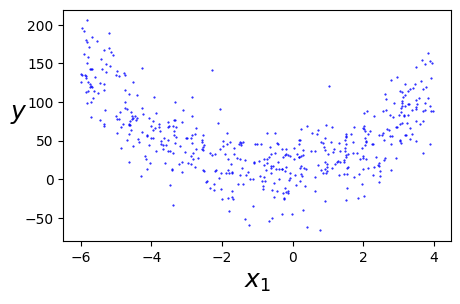

In [27]:
plt.figure(figsize=(5, 3))
plt.plot(x, y, "b.", markersize=1)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

lin_reg = LinearRegression()
svr = SVR()
tree_reg = DecisionTreeRegressor(random_state=1)

In [31]:
for clf in (lin_reg, svr, tree_reg):
  clf.fit(x_train, y_train)
  print(clf.__class__.__name__, clf.score(x_test, y_test))

LinearRegression 0.4199235040893752
SVR 0.4397929418853448
DecisionTreeRegressor 0.14383561643835596


In [32]:
from sklearn.ensemble import VotingRegressor

en_reg = VotingRegressor([
  ('lr', lin_reg),
  ('svr', svr),
  ('tree', tree_reg)
])

en_reg.fit(x_train, y_train)
en_reg.score(x_test, y_test)

0.44727839653590984